In [1]:
import numpy as np
import pysal as ps
import random as rdm
from pysal.contrib.viz import mapping as maps
%matplotlib inline
from pylab import *

# Guide for the `mapping` module in `PySAL`

Contributors:

* Dani Arribas-Bel `<daniel.arribas.bel@gmail.com>`
* Serge Rey `<sjsrey@gmail.com>`


This document describes the main structure, components and usage of the mapping module in `PySAL`. The is organized around three main layers:

* A lower-level layer that reads polygon, line and point shapefiles and returns a Matplotlib collection.
* A medium-level layer that performs some usual transformations on a Matplotlib object (e.g. color code polygons according to a vector of values).
* A higher-level layer intended for end-users for particularly useful cases and style preferences pre-defined (e.g. Create a choropleth).

## Lower-level component

This includes basic functionality to read spatial data from a file (currently only shapefiles supported) and produce rudimentary Matplotlib objects. The main methods are:

* `map_poly_shape`: to read in polygon shapefiles

* `map_line_shape`: to read in line shapefiles

* `map_point_shape`: to read in point shapefiles

These methods all support an option to subset the observations to be plotted (very useful when missing values are present). They can also be overlaid and combined by using the `setup_ax` function. the resulting object is very basic but also very flexible so, for minds used to matplotlib this should be good news as it allows to modify pretty much any property and attribute.

### Example

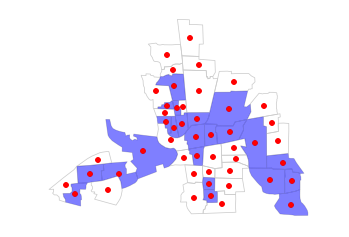

In [2]:
shp_link = ps.examples.get_path('columbus.shp')
shp = ps.open(shp_link)
some = [bool(rdm.getrandbits(1)) for i in ps.open(shp_link)]

fig = figure()

base = maps.map_poly_shp(shp)
base.set_facecolor('none')
base.set_linewidth(0.75)
base.set_edgecolor('0.8')
some = maps.map_poly_shp(shp, which=some)
some.set_alpha(0.5)
some.set_linewidth(0.)
cents = np.array([poly.centroid for poly in ps.open(shp_link)])
pts = scatter(cents[:, 0], cents[:, 1])
pts.set_color('red')

ax = maps.setup_ax([base, some, pts])
fig.add_axes(ax)
show()

## Medium-level component

This layer comprises functions that perform usual transformations on matplotlib objects, such as color coding objects (points, polygons, etc.) according to a series of values. This includes the following methods:

* `base_choropleth_classless`

* `base_choropleth_unique`

### Example

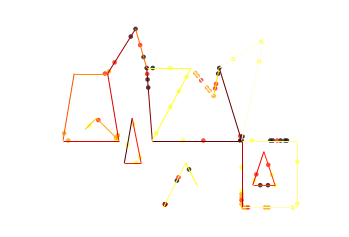

In [3]:
net_link = ps.examples.get_path('eberly_net.shp')
net = ps.open(net_link)
values = np.array(ps.open(net_link.replace('.shp', '.dbf')).by_col('TNODE'))

pts_link = ps.examples.get_path('eberly_net_pts_onnetwork.shp')
pts = ps.open(pts_link)

fig = figure()

netm = maps.map_line_shp(net)
netc = maps.base_choropleth_unique(netm, values)

ptsm = maps.map_point_shp(pts)
ptsm = maps.base_choropleth_classif(ptsm, values)
ptsm.set_alpha(0.5)
ptsm.set_linewidth(0.)

ax = maps.setup_ax([netc, ptsm])
fig.add_axes(ax)
show()


* `base_choropleth_classif`

## Higher-level component

This currently includes the following end-user functions:

* `plot_poly_lines`: very quick shapefile plotting.

callng plt.show()


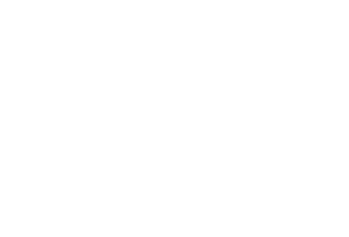

In [4]:
maps.plot_poly_lines(ps.examples.get_path('columbus.shp'))


* `plot_choropleth`: for quick plotting of several types of chocopleths.

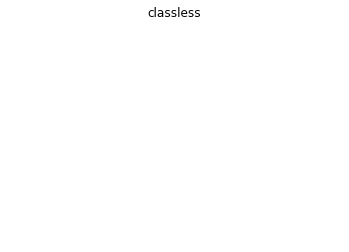

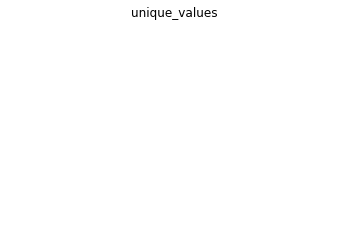

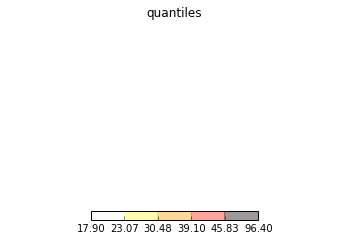

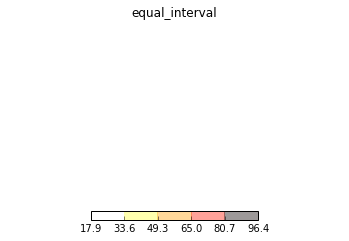

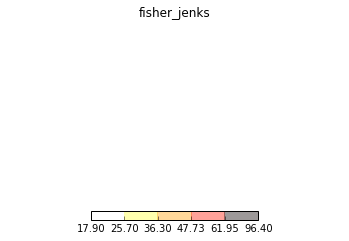

In [5]:
shp_link = ps.examples.get_path('columbus.shp')
values = np.array(ps.open(ps.examples.get_path('columbus.dbf')).by_col('HOVAL'))

types = ['classless', 'unique_values', 'quantiles', 'equal_interval', 'fisher_jenks']
for typ in types:
    maps.plot_choropleth(shp_link, values, typ, title=typ)

# To-Do list

General concepts and specific ideas to implement over time, with enough description so they can be brought to life.

* Support for points in medium and higher layer
* LISA cluster maps

## Caution note on plotting points

Support for points (dots) is still not quite polished. Ideally, one would like to create a `PathCollection` from scratch so it is analogue to the creation of a `PolyCollection` or `LineCollection`. However, for the time being, we are relying on the wrapper `plt.scatter`, which makes it harder to extract the collection and plug it in a different figure. For that reason, it is recommended that, for the time being, one creates the line and/or polygon map as shown in this notebook and then grabs the output axis and uses `ax.scatter` to overlay the points.

**NOTE**: the `PathCollection` created by `plt.scatter` is detailed on line 3142 of [`_axes.py`](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/axes/_axes.py). Maybe we can take some inspiration from there to create our own `PathCollection` for points so they live at the same level as polygons.